# Homework 3, MSBC.5190 Modern Artificial Intelligence


**Teammates: Kersti Kammerer, Alyssa Duke, Wes Weber**

**Teamname: Team1**

Handout 03/23/2023 4pm, **due 04/07/2023 by 4pm**. Please submit through Canvas. Each team only needs to submit one copy. Please self sign up your teams on Canvas.

Important information about submission:
- Write all code, text (answers), and figures in the notebook.
- Please make sure that the submitted notebook has been run and the cell outputs are visible.
- Please print the notebook as PDF and submit it together with the notebook. Your submission should contain two files: `homework3-teamname.ipynb` and `homework3-teamname.pdf`

The goal of the homework is to practice buidling recommender system using Surprise.

1.   Neighborhood-based collaborative filtering with Surprise
2.   Latent factor collaborative filtering with Surprise

First, import the packages or modules required for this homework.

In [1]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195768 sha256=db276ac3bd66c5437b48df185d9918213e98ac9397750912eb89477df4a7d755
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [2]:
################################################################################
# TODO: Fill in your codes                                                     #
# Import packages or modules                                                   #
################################################################################
import pandas as pd

Please download `book_ratings.csv` from Canvas and upload it to Google Colab. The file contains a total of 41,337 book ratings from users. It is part of the [Book Crossing](http://www2.informatik.uni-freiburg.de/~cziegler/BX/) dataset, which was collected by Cai-Nicolas in a 4-week crawl (August / September 2004) from the Book-Crossing community. In the original rating files, there are two types of ratings: explicit ratings that are expressed on a scale from 1-10 and implicit ratings. For this homework, we only kept explicit ratings. We also only kept users with at least 10 ratings and books with at least 20 ratings in the original dataset.

In [3]:
from surprise import Dataset
from surprise import Reader
import pandas as pd

df = pd.read_csv('book_ratings.csv')
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], 
                                  reader)            

In [4]:
df.head()

,user_id,book_id,rating
0,1295,4,10
1,1295,83,9
2,1295,336,8
3,1295,448,10
4,1295,596,8



**Inline Question #1:** 
How many users and books are in the dataset?

**Your Answer:** 
There are 1,834 users and 2,172 books. 

In [5]:
################################################################################
# TODO: Fill in your codes                                                     #
# Import packages or modules                                                   #
################################################################################
print(f'Number of users: {df["user_id"].nunique()}')
print(f'Number of books: {df["book_id"].nunique()}')

Number of users: 1834
Number of books: 2172


## Part I: Neighborhood-based collaborative filtering with Surprise




We will begin by trying to build a neighborhood-based collaborative filtering recommender system. There are two types of neighborhood-based CF methods: user-based and item-based. 

**Inline Question #2:** 
Please briefly explain the difference between user-based and item-based collaborative filtering methods.

**Your Answer:**
User based collaborative filtering recommends items based on preferences of similar users. Users with similar interests and preferences are identfied nased on past interactions. Once similarities are established, the system recommends items that are popular among similar users. 

Item based collaborative filtering, on the other hand, considers an items attributes which describe an item. A user's taste defines values and weights for each attribute. Based on these attributes and weights, similar items are recommended based on those that an individual has interacted with in the past.   

Recall in our lecture, we discussed a few questions to be answered for neighborhood-based collaborative filtering apporach, specifically

1.   How do we measure similarity?
2.   How many neighbors should we consider?
3.   How do we generate a prediction from the neighbors’ ratings?

For each of the questions above, we have a few potential options: 

1.   similarity measures: (1) cosine similarity, (2) pearson correlation
2.   number of neighbors: (1) 10, (2) 20, (3) 50
3.   predicted rating: (1) weighted average, (2) weighted average after taking into account the mean rating of each user (or item)
4.   Finally, we could try either (1) user-based, i.e., similarities are computed between users, or (2) item-based, i.e., similarities are calculated between items, approach.

There are total of 2 x 3 x 2 x 2 = 24 combinations of options, i.e., 24 different model specifications. Please select the best model according to its performance on root mean squared error (RMSE) using five fold cross-validation.

**Inline Question #3:** 
What is the best neighborhood-based collaborative filtering model specification on this book rating dataset?

**Your Answer:**
We found that the best model is the KNNWithMeans model with:
1. Cosine Similarity
2. 50 neighbors 
3. A weighted average after taking into account the mean rating of each item. 
4. Item-based similarities.  

**Hints**: 

*   Surprise has a class called `GridSearchCV` for tunning algorithm parameters.
*   `KNNBasic` and `KNNWithMeans` are neighborhood-based collaborative filtering methods implemented in Surprise. 

  

In [6]:
from surprise.prediction_algorithms.knns import KNNWithMeans, KNNBasic
from surprise.model_selection import GridSearchCV

################################################################################
# TODO: Fill in your codes                                                     #
# Import packages or modules                                                   #
################################################################################
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)
param_grid = {'k': [10, 20, 50],
              'sim_options': {'name': ['cosine', 'pearson'],'user_based': [True, False]}}
 
algo = KNNWithMeans
gs = GridSearchCV(algo, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing

In [7]:
print('Best KNNWithMeans RMSE score:', gs.best_score['rmse'])
print('Best KNNWithMeans parameters:', gs.best_params['rmse'])

Best KNNWithMeans RMSE score: 1.58363170258774
Best KNNWithMeans parameters: {'k': 50, 'sim_options': {'name': 'cosine', 'user_based': False}}


In [8]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)
param_grid = {'k': [10, 20, 50],
              'sim_options': {'name': ['cosine', 'pearson'],'user_based': [True, False]}}
 
algo2 = KNNBasic
gs2 = GridSearchCV(algo2, param_grid, measures=['rmse'], cv=5)
gs2.fit(data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing

In [9]:
print('Best KNNBasic RMSE score:', gs2.best_score['rmse'])
print('Best KNNBasic parameters:', gs2.best_params['rmse'])

Best KNNBasic RMSE score: 1.6140697622313478
Best KNNBasic parameters: {'k': 50, 'sim_options': {'name': 'cosine', 'user_based': False}}


## Part II Latent factor collaborative filtering with Surprise

Latent factor approaches to collaborative filtering try to explain the observed user preferences (i.e., ratings) through the interaction of unseen factors. Specifically, it conjectures that the rating matrix is actually the product of two long and thin matrices, representing user and item factors, as shown below.
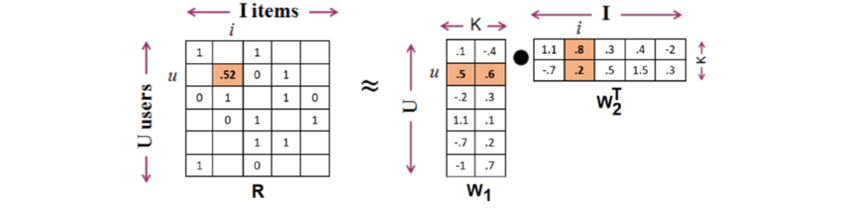

The user matrix has U rows and K columns (i.e., there are U users and K latent factors). The item matrix has K rows and I columns (i.e., there are I items and K latent factors). Each row in the user matrix can be considered as a user's taste and each column in the item matrix can be considered as an item's appeal to tastes. We can estimate the two latent factor matrices (i.e., infer the latent factors) based on the known ratings from the rating matrix, and then use the estimated latent factor matrices to infer the unknown ratings in the original rating matrix, as demonstrated below:


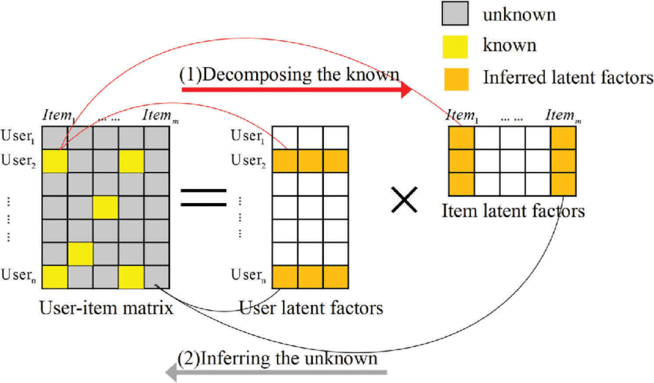

With its basic version, we assume that user *u*'s rating on item *i* is a product of the latent user factor and latent item factor $p_u q_i$, as described above. 

We can improve the method by adding user specific bias terms and item specific bias terms. We calculate user *u*'s rating on item *i* as the sum of user bias term, item bias term, and the product of user and item factors, i.e., $b_u + b_i + p_u q_i$. The bias term of an item describes how well this item is rated compared to average across all items. The bias term of a user describes that user's tendency to give better or worse ratings than the average. 


Both the basic approach and the one including bias terms are implemented in [`SVD`](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD) in Surprise. You can choose to use the basic version by setting the argument `biased` to `False`, and choose to use the version with bias terms by setting `biased` to `True`.

With latent factor collaborative filtering, an important hyperparamter to tune is the number of latent factors in the user and item matricies. You can set it with the argument `n_factors` in `SVD`.

For this part of the homework, please find the best number of latent factors out of {5, 10, 20} using five fold cross-validation. Please also find out whether the basic version of SVD or the version including bias terms achieves better performance according to root mean squared error (RMSE). You need to do a grid search on the combinations of the following two hyperparameters:


*   n_factors = {5, 10, 20}
*   biased = {True, False}



**Inline Question #4:** 
What is the best latent factor collaborative filtering model specification, i.e., n_factors = ? and biased = ?

**Your Answer:**
The best latent collaborative filtering model specification has 5 factors and biased = True (RMSE = 1.50). 


In [10]:
################################################################################
# TODO: Fill in your codes                                                     #
# Import packages or modules                                                   #
################################################################################
from surprise.model_selection import GridSearchCV
from surprise import SVD

data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)
param_grid = {'n_factors': [5, 10, 20], 'biased': [True, False]}
algo3 = SVD
gs3 = GridSearchCV(algo3, param_grid, measures=['rmse'], cv=5)
gs3.fit(data)

In [11]:
print(f"SVD Best Parameters: {gs3.best_params['rmse']}")
print(f"Best RMSE: {gs3.best_score['rmse']}")

SVD Best Parameters: {'n_factors': 5, 'biased': True}
Best RMSE: 1.5006062104196045
